### Import dos Pacotes

In [1]:
import pandas as pd
import numpy as np
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, plot_confusion_matrix,\
accuracy_score, precision_score
from sklearn.model_selection import train_test_split

from tqdm import tqdm

### Import dos Dados

In [2]:
df  = pd.read_csv('zoo.csv')

In [3]:
# primeiras linhas do dataframe
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
# formato dos dados
df.shape

(101, 18)

In [5]:
# amostras por classe
df['class_type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: class_type, dtype: int64

In [6]:
# verificando por NAs
df.isna().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

- Não há valores faltantes no dataframe

In [7]:
X = df[['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 
        'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize']]
y = df['class_type']
xcols = X.columns

### Normalizando os Dados

In [8]:
# instanciando o objeto
scaler = MinMaxScaler()

# aplicando a transformação e salvando em outro df
X = scaler.fit_transform(X)

# voltando para um dataframe
X = pd.DataFrame(X, columns=xcols)

# exibindo as 5 primeiras linhas
X.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.5,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.5,1.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.5,0.0,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.5,1.0,0.0,1.0


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42)

### Criando e avaliando o Classificador KNN

In [10]:
#Testanto k entre 2 e 15 para o KNN:
for k in tqdm(range(2, 16)):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print('\n----------- K = {} --------------------------'.format(k))
    print(classification_report(y_test, y_pred))

  0%|                                                                                           | 0/14 [00:00<?, ?it/s]C:\Users\marcelo.costa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\marcelo.costa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\marcelo.costa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being


----------- K = 2 --------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21


----------- K = 3 --------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1

C:\Users\marcelo.costa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\marcelo.costa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 69.31it/s]

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       0.67      1.00      0.80         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       0.00      0.00      0.00         3
           7       0.33      1.00      0.50         1

    accuracy                           0.81        21
   macro avg       0.44      0.67      0.52        21
weighted avg       0.71      0.81      0.75        21



### Respostas do Exercício

Temos que o KNN, usando **K = 2**, mostrou o melhor resultado entre as simulações, com 100% de precisão e acurácia. Os resultados estão novamente reproduzidos abaixo, com a matriz de confusão e os dados de precisão e acurácia.

#### - Matriz de Confusão

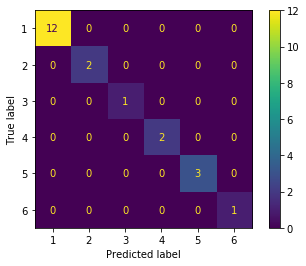

In [11]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
plot_confusion_matrix(knn, X_test, y_test);

#### - Precisão e Acurácia

In [12]:
y_pred = knn.predict(X_test)
print('Acurácia do modelo com K = 2: {}'.format(accuracy_score(y_test, y_pred)))
print('Precisão do modelo com K = 2: {}'.format(precision_score(y_test, y_pred, average='macro')))

Acurácia do modelo com K = 2: 1.0
Precisão do modelo com K = 2: 1.0
